# 6.5.1 Máquinas de soporte vectorial (SVM)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, BallTree, KDTree

import warnings
warnings.filterwarnings("ignore")

link: https://www.youtube.com/watch?v=-gAkh9H2qRw

Las metodologías basadas en vecinos más cercanos, requieren de la computación eficiente de las distancias entre puntos. Scikit-learn implementa un método para el cómputo eficiente de dichas distancias, el cual usa los algoritmos ball-tree y kd-tree.

## 6.5.1.1 Definición del problema
A partir de un dataset conformado por los puntos azules de la siguiente gráfica, se desea encontrar el subconjunto de puntos $k$ puntos más cercanos a cada punto de un conjunto arbitrario, representado por los puntos naranja.

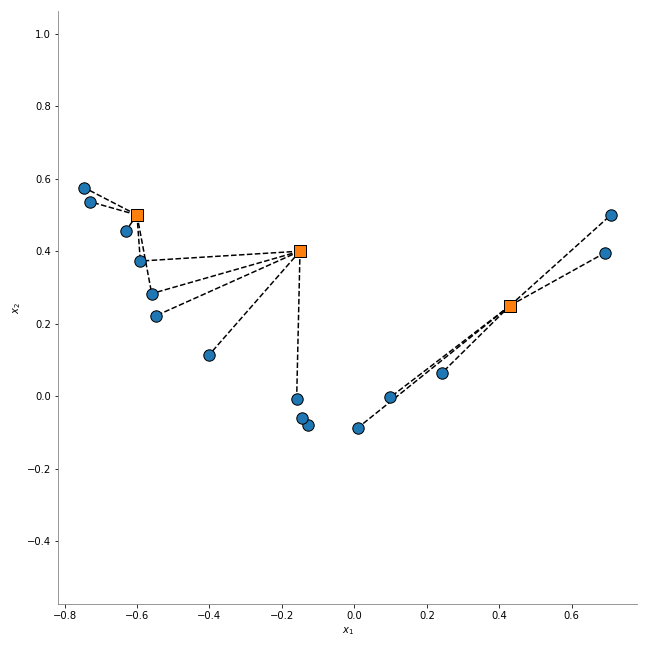

## 6.5.1.2 Nearest Neighbors

In [3]:
#
# Matriz de datos para todos los ejemplos
#

#
# Puntos azules de la gráfica anterior
#
np.random.seed(2)
X = np.random.random((15, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

In [4]:
nearestNeighbors = NearestNeighbors(
    # -----------------------------------------------------
    # Number of neighbors to use by default for kneighbors
    # queries
    n_neighbors=4,
    # -----------------------------------------------------
    # Range of parameter space to use by default for
    # radius_neighbors queries.
    radius=1.0,
    # -----------------------------------------------------
    # Algorithm used to compute the nearest neighbors:
    # 'ball_tree', 'kd_tree', 'brute', 'auto'
    algorithm="ball_tree",
    # -----------------------------------------------------
    # The distance metric to use for the tree.
    metric="minkowski",
).fit(X)

In [5]:
#
# Encuentra los k-vecinos un grupo de puntos.
#

X_new = np.array(
    [
        [-0.15, 0.4],
        [0.43, 0.25],
        [-0.60, 0.5],
    ]
)

distances, indices = nearestNeighbors.kneighbors(X_new)
indices

array([[ 4,  2, 14, 13],
       [ 5,  9,  8,  1],
       [ 7,  3,  6, 12]])

In [6]:
distances

array([[0.38037936, 0.40867291, 0.42581141, 0.43610505],
       [0.26390434, 0.30108403, 0.37386793, 0.41640179],
       [0.05440066, 0.12755537, 0.13592841, 0.16403049]])

In [7]:
#
# Matriz binaria indicando las conexiones entre puntos
#
nearestNeighbors.kneighbors_graph(X_new).toarray()

array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.]])

## 6.5.1.3 Algoritmo Ball-Tree

Este algoritmo se basa en el particionamiento del espacio de entrada en hiperesferas anidadas. Este modelo es interpretado como un arbol binario donde cada nodo define una esfera D-dimensional, la cual contiene un subconjunto de datos.

- Cada nodo interno del arbol parte el subconjunto de datos en dos hiperesferas independientes.
- Aunque las hiperesferas pueden intersectarse, cada punto es asignado a una y solo una hiperesfera.
- Siguiendo los principios del particioamiento recursivo, cada nodo define una hiperesfera que contiene todos los nodos que pertenecen a dicho subarbol.
- En el caso del algoritmo de NearestNeighbors, el algoritmo BallTree genera esferas que contienen todos los puntos cercanos.

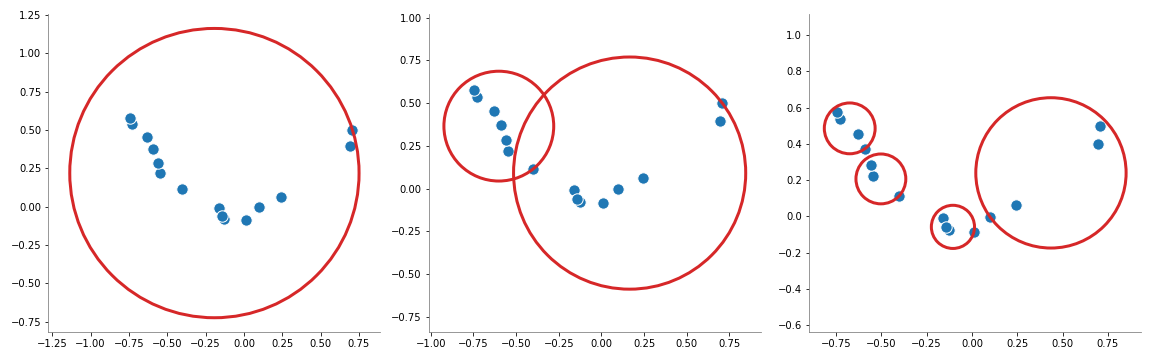

In [8]:
ballTree = BallTree(X, leaf_size=2)

dist, ind = ballTree.query(
    # -----------------------------------------------------
    # Points
    X=X_new,
    # -----------------------------------------------------
    # The number of nearest neighbors to return
    k=3,
    # -----------------------------------------------------
    # f True, return a tuple (d, i) of distances and
    # indices if False, return array i
    return_distance=True,
    # -----------------------------------------------------
    # if True, then distances and indices of each point are
    # sorted
    sort_results=True,
)

display(
    ind,
    dist,
)

array([[ 4,  2, 14],
       [ 5,  9,  8],
       [ 7,  3,  6]])

array([[0.38037936, 0.40867291, 0.42581141],
       [0.26390434, 0.30108403, 0.37386793],
       [0.05440066, 0.12755537, 0.13592841]])

In [9]:
#
# Query the tree for neighbors within a radius r
#
ballTree.query_radius(
    # -----------------------------------------------------
    # An array of points to query
    X[:1],
    # -----------------------------------------------------
    # distance within which neighbors are returned
    r=1.0,
    # -----------------------------------------------------
    # if True, return only the count of points within
    # distance r
    count_only=True,
    # -----------------------------------------------------
    # if True, the distances and indices will be sorted
    # before being returned
    sort_results=False,
)

array([14])

In [10]:
#
# Compute a gaussian kernel density estimate
#
ballTree.kernel_density(
    # -----------------------------------------------------
    # An array of points to query
    X=X_new,
    # -----------------------------------------------------
    # the bandwidth of the kernel
    h=0.1,
    # -----------------------------------------------------
    # 'gaussian', 'tophat', 'epanechnikov', 'exponential',
    # 'linear', 'cosine'
    kernel="gaussian",
)

array([2.01557208e-02, 6.77755878e-01, 3.29235309e+01])

## 6.5.1.4 Algoritmo KD-Tree

En este algoritmo, la partición del espacio se hace mediante hiperplanos paralelos a los ejes coordenados que dividen el espacio en hipercubos, el cual se interpreta como un árbol binario.

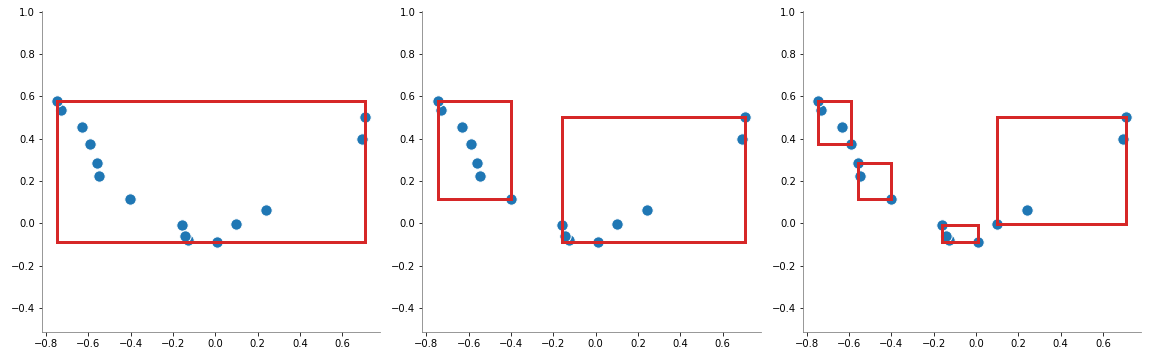

In [11]:
kdTree = KDTree(X, leaf_size=2)

dist, ind = kdTree.query(X_new, k=3)

display(
    ind,
    dist,
)

array([[ 4,  2, 14],
       [ 5,  9,  8],
       [ 7,  3,  6]])

array([[0.38037936, 0.40867291, 0.42581141],
       [0.26390434, 0.30108403, 0.37386793],
       [0.05440066, 0.12755537, 0.13592841]])

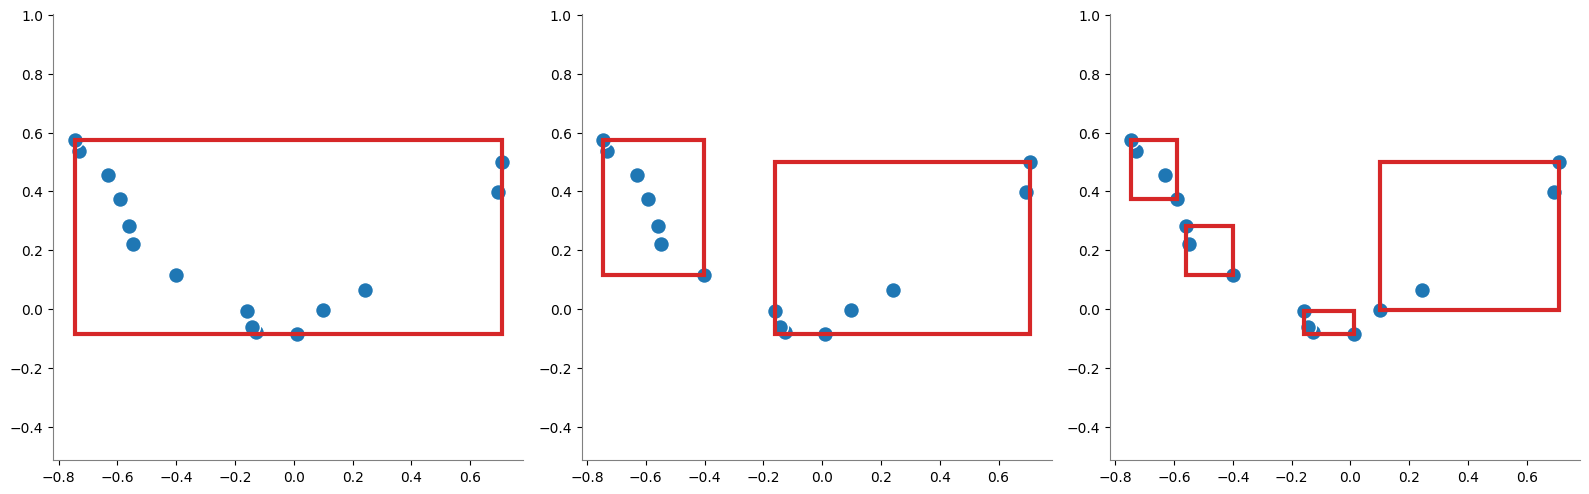

In [12]:
def fig_kdtree():

    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib.patches import Rectangle
    from sklearn.neighbors import KDTree

    np.random.seed(2)
    X = np.random.random((15, 2)) * 2 - 1
    X[:, 1] *= 0.1
    X[:, 1] += X[:, 0] ** 2

    tree = KDTree(X, leaf_size=2)
    _, _, _, node_bounds = tree.get_arrays()

    hyperplanes = [[0], [1, 2], [3, 4, 5, 6]]

    plt.figure(figsize=(16, 5))

    for i_plot, plane_indices in enumerate(hyperplanes):

        plt.subplot(1, 3, i_plot + 1)

        plt.scatter(
            X[:, 0], X[:, 1], marker="o", s=130, edgecolors="white", c="tab:blue"
        )

        for index in plane_indices:

            p0 = node_bounds[0][index]
            p1 = node_bounds[1][index]

            width = p1[0] - p0[0]
            height = p1[1] - p0[1]
            plt.gca().add_patch(
                Rectangle(p0, width, height, fill=False, ec="tab:red", lw=3, fc="none")
            )

            plt.gca().spines["left"].set_color("gray")
            plt.gca().spines["bottom"].set_color("gray")
            plt.gca().spines["top"].set_visible(False)
            plt.gca().spines["right"].set_visible(False)
            plt.axis("equal")

    plt.tight_layout()
    # plt.savefig("images/kdtree.png")
    # plt.close()

fig_kdtree()

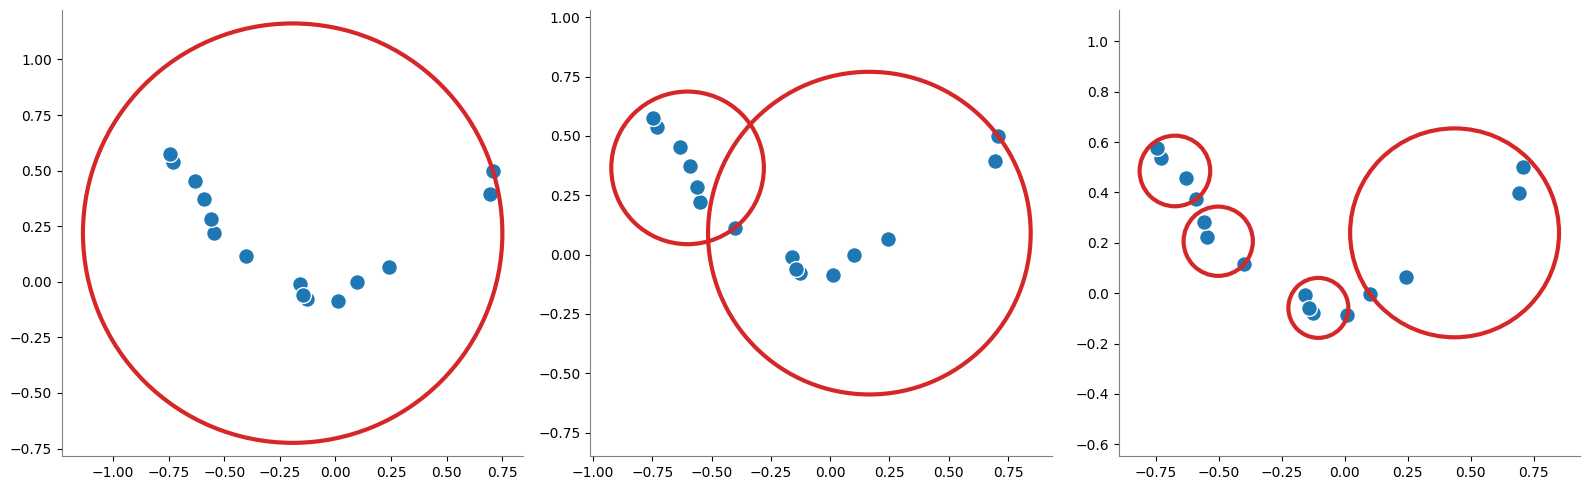

In [13]:
def fig_balltree():

    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib.patches import Circle
    from sklearn.neighbors import BallTree

    #
    # Generación de la muestra de datos
    #
    np.random.seed(2)
    X = np.random.random((15, 2)) * 2 - 1
    X[:, 1] *= 0.1
    X[:, 1] += X[:, 0] ** 2

    #
    # Generación del arbol
    #
    tree = BallTree(X, leaf_size=2)
    _, _, node_data, node_bounds = tree.get_arrays()

    balls = [[0], [1, 2], [3, 4, 5, 6]]

    plt.figure(figsize=(16, 5))

    for i_plot, ball_indices in enumerate(balls):

        plt.subplot(1, 3, i_plot + 1)
        plt.scatter(
            X[:, 0], X[:, 1], marker="o", s=130, edgecolors="white", c="tab:blue"
        )

        for index in ball_indices:
            center = node_bounds[0][index]
            radius = node_data[index][3]
            plt.gca().add_patch(Circle(center, radius, ec="tab:red", lw=3, fc="none"))

        plt.gca().spines["left"].set_color("gray")
        plt.gca().spines["bottom"].set_color("gray")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.axis("equal")

    plt.tight_layout()
    # plt.savefig("images/balltree.png")
    # plt.close()

fig_balltree()

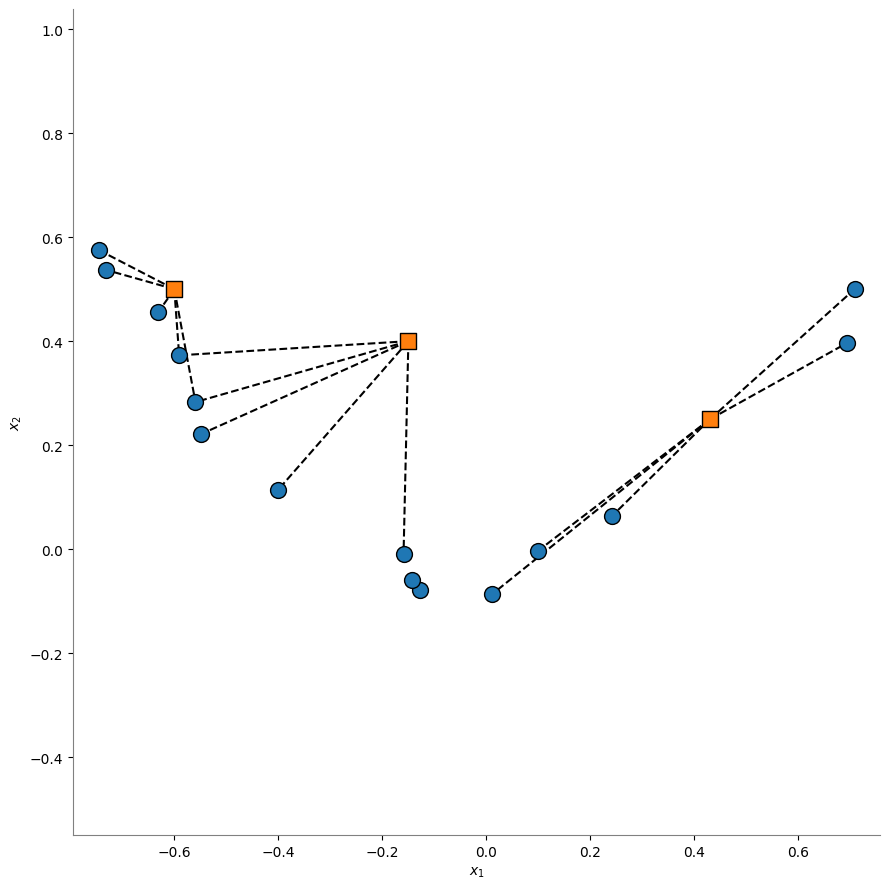

In [14]:
def fig_nearestNeighbors():

    import numpy as np
    from matplotlib import pyplot as plt
    from sklearn.neighbors import NearestNeighbors

    #
    # Generación de la muestra de datos
    #
    np.random.seed(2)
    X = np.random.random((15, 2)) * 2 - 1
    X[:, 1] *= 0.1
    X[:, 1] += X[:, 0] ** 2

    plt.figure(figsize=(9, 9))
    plt.scatter(X[:, 0], X[:, 1], marker="o", s=130, edgecolors="black", c="tab:blue")

    X_new = np.array(
        [
            [-0.15, 0.4],
            [0.43, 0.25],
            [-0.60, 0.5],
        ]
    )
    plt.scatter(
        X_new[:, 0],
        X_new[:, 1],
        marker="s",
        s=130,
        edgecolors="black",
        c="tab:orange",
        zorder=10,
    )

    nearestNeighbors = NearestNeighbors(
        n_neighbors=3,
        algorithm="kd_tree",
    ).fit(X)

    neighbors = nearestNeighbors.kneighbors(X_new, 5, return_distance=False)

    for i_new_point in range(len(X_new)):
        for neighbor in neighbors[i_new_point]:
            plt.plot(
                [X_new[i_new_point][0], X[neighbor, 0]],
                [X_new[i_new_point][1], X[neighbor, 1]],
                "--k",
                zorder=0,
            )

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.axis("equal")
    plt.tight_layout()
    # plt.savefig("images/nearestNeighbors.png")
    # plt.close()

fig_nearestNeighbors()

In [15]:
print('ok_')

ok_
